# plotting all points in a single plot

/home/xlpy/.pyenv/versions/3.8.5/envs/carcrash/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

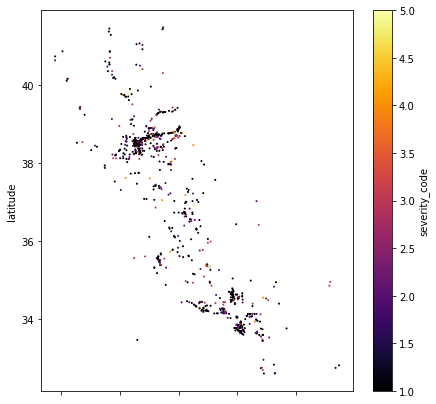

In [61]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

coll = pd.read_csv('../raw_data/csv/collisions.csv')
df = coll.copy()[['latitude','longitude','collision_severity','collision_date']].dropna().reset_index()

severity = {'property damage only':1,'pain':2,'other injury':3,'severe injury':4,'fatal':5}
df['severity_code'] = df.collision_severity.apply(lambda x : severity[x])

df.plot.scatter(x='longitude', y='latitude',figsize=(7,7),c='severity_code',colormap='inferno',s=0.1)

# plotting one plot for each year

In [63]:
df.rename(columns={'collision_date':'year'},inplace=True)
df.year = df.year.apply(lambda x : pd.to_datetime(x).year)

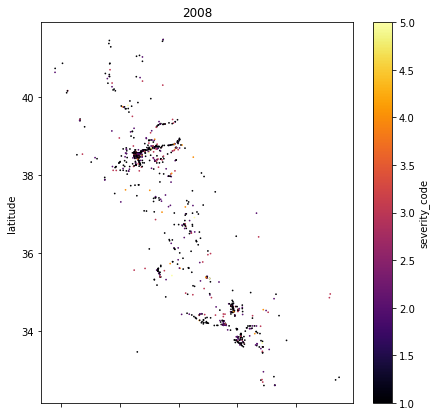

In [64]:
for year in range(min(df.year.value_counts().keys()),max(df.year.value_counts().keys())+1): # adjusting to nrows = ...
    df[df.year == year].plot.scatter(x='longitude', y='latitude',figsize=(7,7),c='severity_code',colormap='inferno',s=0.1,title=str(year))
    
    
    
    